<a href="https://colab.research.google.com/github/EdwinAR99/TalentoTECH-Repo/blob/master/Introduction_Convolution_TalentoTECH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBS

In [1]:
import numpy as np
from scipy.signal import convolve2d

import cv2
from google.colab.patches import cv2_imshow

# CONVOLVE 1D

In [16]:
# Defined the input signals and the filter
x = np.array([2, 1, 0, 1, 2])
h = np.array([1, -1])

# Realized the convolution
y = np.convolve(x, h, mode='valid')

# Print result
print('Señal de salida despues de la convolucion:')
print(y)

Señal de salida despues de la convolucion:
[-1 -1  1  1]


Codigo de explicacion paso a paso

In [6]:
import numpy as np

def convolution_step_by_step_verbose(x, h):
    # Revertimos el filtro
    h = np.flip(h)

    # Calcula el tamaño de la salida
    output_size = len(x) - len(h) + 1

    # Inicializa la salida
    y = np.zeros(output_size)

    print("Señal de entrada (x):", x)
    print("Filtro (h):", h)
    print("Convolution output (y):")

    print("\nRevertir el filtro(h):")
    print(np.flip(h), "a la forma", h)

    # Realiza la convolución paso a paso
    for i in range(output_size):
        print("\nDesplazamiento:", i)
        print("Segmento de señal de entrada (x) superpuesto con el filtro (h):")
        print("x[{}:{}] * h =".format(i, i + len(h)), x[i:i+len(h)], "*", h)
        convolution_result = x[i:i+len(h)] * h
        print("Multiplicación punto a punto:", convolution_result)
        y[i] = np.sum(convolution_result)
        print("Suma de los resultados:", y[i])

    return y

# Definir las señales de entrada y el filtro
x = np.array([2, 1, 0, 1, 2])
h = np.array([1, -1])

# Realizar la convolución paso a paso
y_step_by_step_verbose = convolution_step_by_step_verbose(x, h)

# Imprimir el resultado final
print("\nSeñal de salida después de la convolución paso a paso:")
print(y_step_by_step_verbose)

Señal de entrada (x): [2 1 0 1 2]
Filtro (h): [-1  1]
Convolution output (y):

Revertir el filtro(h):
[ 1 -1] a la forma [-1  1]

Desplazamiento: 0
Segmento de señal de entrada (x) superpuesto con el filtro (h):
x[0:2] * h = [2 1] * [-1  1]
Multiplicación punto a punto: [-2  1]
Suma de los resultados: -1.0

Desplazamiento: 1
Segmento de señal de entrada (x) superpuesto con el filtro (h):
x[1:3] * h = [1 0] * [-1  1]
Multiplicación punto a punto: [-1  0]
Suma de los resultados: -1.0

Desplazamiento: 2
Segmento de señal de entrada (x) superpuesto con el filtro (h):
x[2:4] * h = [0 1] * [-1  1]
Multiplicación punto a punto: [0 1]
Suma de los resultados: 1.0

Desplazamiento: 3
Segmento de señal de entrada (x) superpuesto con el filtro (h):
x[3:5] * h = [1 2] * [-1  1]
Multiplicación punto a punto: [-1  2]
Suma de los resultados: 1.0

Señal de salida después de la convolución paso a paso:
[-1. -1.  1.  1.]


#CONVOLVE 2D

In [10]:
# Defined the input matrix (signal) and the kernel
input_matrix = np.array([[1, 2, 3, 3],
                        [4, 5, 6, 6],
                        [7, 8, 9, 9],
                        [7, 8, 9, 9]])

kernel = np.array([[0, 1, 0],
                   [-1, 1, -1],
                   [0, 1, 0]])

# Realized the convolution 2D
output_matrix = convolve2d(input_matrix, kernel, mode='valid')

print('Matriz de salida despues de la convolucion:')
print(output_matrix)

Matriz de salida despues de la convolucion:
[[5 7]
 [5 7]]


Rellenar con ceros

In [ ]:
# Realized the convolution 2D
output_matrix_same = convolve2d(input_matrix, kernel, mode='same')

print('Matriz de salida despues de la convolucion del mismo tamaño:')
print(output_matrix_same)

Matriz de salida despues de la convolucion del mismo tamaño:
[[ 3  3  4  6]
 [ 7  5  7 12]
 [10  5  7 15]
 [ 6  0  1  9]]


Como hacer para que la imagen se convolucione con el filtro y el resultado sea del mismo tamaño del filtro

Codigo de explicacion paso a paso

In [ ]:
def convolve2d_step_by_step_verbose(input_matrix, kernel):
    # Obtener las dimensiones de la matriz de entrada y el kernel
    input_height, input_width = input_matrix.shape
    kernel_height, kernel_width = kernel.shape

    # Calcular las dimensiones de la matriz de salida
    output_height = input_height - kernel_height + 1
    output_width = input_width - kernel_width + 1

    # Inicializar la matriz de salida
    output_matrix = np.zeros((output_height, output_width))

    print("Matriz de entrada:")
    print(input_matrix)
    print("Kernel:")
    print(kernel)
    print("Matriz de salida después de la convolución:")

    # Realizar la convolución paso a paso
    for i in range(output_height):
        for j in range(output_width):
            print("\nDesplazamiento: ({}, {})".format(i, j))
            print("Superposición de la matriz de entrada con el kernel:")
            print(input_matrix[i:i+kernel_height, j:j+kernel_width])
            convolution_result = input_matrix[i:i+kernel_height, j:j+kernel_width] * kernel
            print("Multiplicación elemento por elemento con el kernel:")
            print(convolution_result)
            output_matrix[i, j] = np.sum(convolution_result)
            print("Suma de los resultados:", output_matrix[i, j])

    return output_matrix

# Definir la matriz de entrada y el kernel
input_matrix = np.array([[1, 2, 3, 3],
                        [4, 5, 6, 6],
                        [7, 8, 9, 9],
                        [7, 8, 9, 9]])

kernel = np.array([[0, 1, 0],
                   [-1, 1, -1],
                   [0, 1, 0]])

# Realizar la convolución 2D paso a paso
output_matrix_step_by_step = convolve2d_step_by_step_verbose(input_matrix, kernel)

# Imprimir la matriz de salida
print("\nMatriz de salida después de la convolución paso a paso:")
print(output_matrix_step_by_step)

Matriz de entrada:
[[1 2 3 3]
 [4 5 6 6]
 [7 8 9 9]
 [7 8 9 9]]
Kernel:
[[ 0  1  0]
 [-1  1 -1]
 [ 0  1  0]]
Matriz de salida después de la convolución:

Desplazamiento: (0, 0)
Superposición de la matriz de entrada con el kernel:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Multiplicación elemento por elemento con el kernel:
[[ 0  2  0]
 [-4  5 -6]
 [ 0  8  0]]
Suma de los resultados: 5.0

Desplazamiento: (0, 1)
Superposición de la matriz de entrada con el kernel:
[[2 3 3]
 [5 6 6]
 [8 9 9]]
Multiplicación elemento por elemento con el kernel:
[[ 0  3  0]
 [-5  6 -6]
 [ 0  9  0]]
Suma de los resultados: 7.0

Desplazamiento: (1, 0)
Superposición de la matriz de entrada con el kernel:
[[4 5 6]
 [7 8 9]
 [7 8 9]]
Multiplicación elemento por elemento con el kernel:
[[ 0  5  0]
 [-7  8 -9]
 [ 0  8  0]]
Suma de los resultados: 5.0

Desplazamiento: (1, 1)
Superposición de la matriz de entrada con el kernel:
[[5 6 6]
 [8 9 9]
 [8 9 9]]
Multiplicación elemento por elemento con el kernel:
[[ 0  6  0]
 [-8  9 -9]


#CONVOLUTIONAL LAYER IN NEURAL NET

In [ ]:
# Charge the image
image = cv2.imread('John.jpg')

Original image:


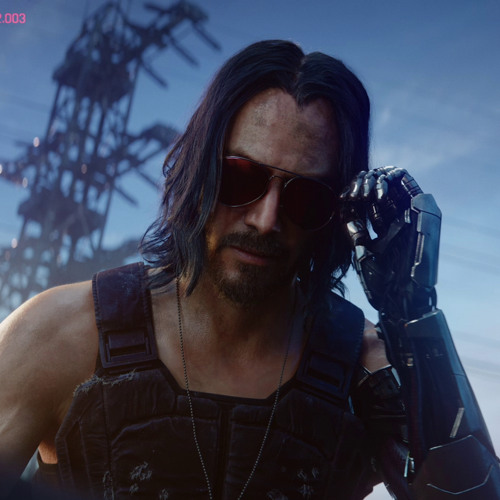

Convolved image:


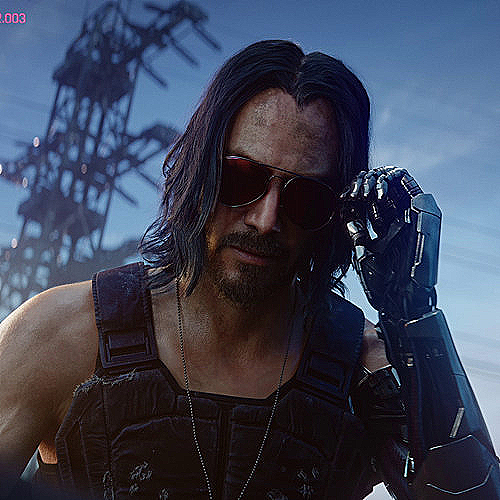

In [ ]:
# Defined the convolutional kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# Apply the convolution
convolved_image = cv2.filter2D(image, -1, kernel)


# Show the original image and the convolved image
print('Original image:')
cv2_imshow(image)
print('Convolved image:')
cv2_imshow(convolved_image)

Second filter

Original image:


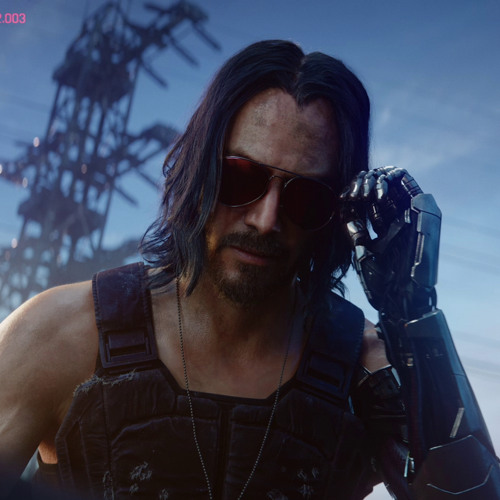

Convolved image:


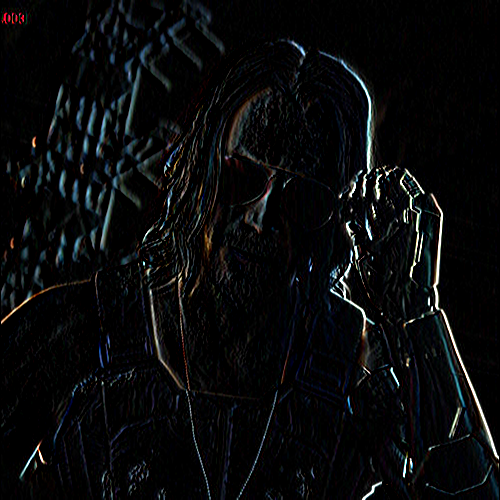

In [ ]:
# Defined the convolutional kernel
kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

# Apply the convolution
convolved_image_v = cv2.filter2D(image, -1, kernel)


# Show the original image and the convolved image
print('Original image:')
cv2_imshow(image)
print('Convolved image:')
cv2_imshow(convolved_image_v)

Third filter

Original image:


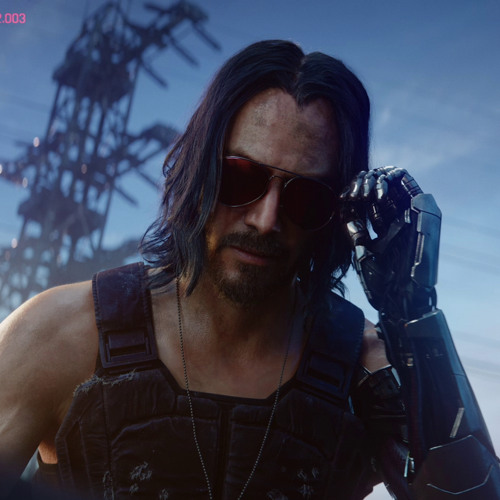

Convolved image:


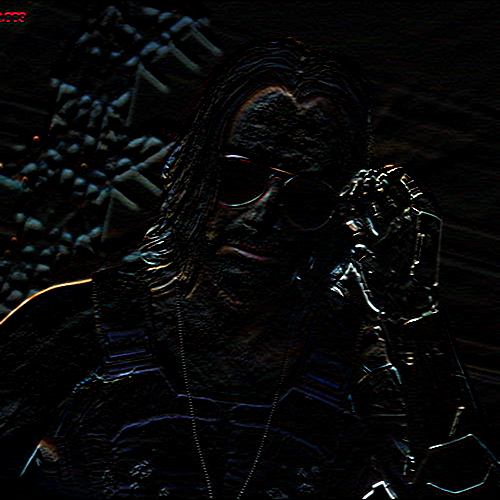

In [ ]:
# Defined the convolutional kernel
kernel = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])

# Apply the convolution
convolved_image_h = cv2.filter2D(image, -1, kernel)


# Show the original image and the convolved image
print('Original image:')
cv2_imshow(image)
print('Convolved image:')
cv2_imshow(convolved_image_h)

# POOLING

In [ ]:
import numpy as np

# Definir la matriz de entrada
input_matrix = np.array([[1, 2, 1, 0],
                         [0, 1, 2, 1],
                         [1, 0, 1, 2],
                         [2, 1, 0, 1]])

# Definir el tamaño y el stride del pooling
pool_size = 2
stride = 2

# Realizar max pooling en una matriz 2D
def max_pooling_2d(input_matrix, pool_size, stride):
    input_height, input_width = input_matrix.shape
    output_height = (input_height - pool_size) // stride + 1
    output_width = (input_width - pool_size) // stride + 1
    pooled_output = np.zeros((output_height, output_width))
    for i in range(output_height):
        for j in range(output_width):
            start_row = i * stride
            start_col = j * stride
            end_row = start_row + pool_size
            end_col = start_col + pool_size
            pooled_output[i, j] = np.max(input_matrix[start_row:end_row, start_col:end_col])
    return pooled_output

# Aplicar max pooling a la matriz de entrada
pooled_matrix_max = max_pooling_2d(input_matrix, pool_size, stride)

# Imprimir resultado
print('Matriz de salida después de max pooling:')
print(pooled_matrix_max)

Matriz de salida después de max pooling:
[[2. 2.]
 [2. 2.]]


In [ ]:
# Realizar average pooling en una matriz 2D
def average_pooling_2d(input_matrix, pool_size, stride):
    input_height, input_width = input_matrix.shape
    output_height = (input_height - pool_size) // stride + 1
    output_width = (input_width - pool_size) // stride + 1
    pooled_output = np.zeros((output_height, output_width))
    for i in range(output_height):
        for j in range(output_width):
            start_row = i * stride
            start_col = j * stride
            end_row = start_row + pool_size
            end_col = start_col + pool_size
            pooled_output[i, j] = np.mean(input_matrix[start_row:end_row, start_col:end_col])
    return pooled_output

# Aplicar average pooling a la matriz de entrada
pooled_matrix_avg = average_pooling_2d(input_matrix, pool_size, stride)

# Imprimir resultado
print('Matriz de salida después de average pooling:')
print(pooled_matrix_avg)

Matriz de salida después de average pooling:
[[1. 1.]
 [1. 1.]]
